In [26]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [27]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


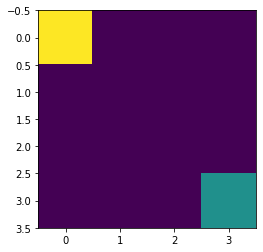

In [28]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [29]:
class GridEnvironment(gym.Env):
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.done = False
        self.timestep = 0

    def reset(self):
        self.state = np.zeros((4, 4))
        self.done = False
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1  # Initial agent position
        self.state[tuple(self.goal_pos)] = 0.5  # Goal position

        self.rocks = [(0, 3), (1, 2)]  # Rocks positions
        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        self.rewards = [(2, 1), (2, 2)]  # Rewards positions
        for reward_pos in self.rewards:
            self.state[reward_pos] = 2  # Positive rewards at reward positions

        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:  # Down
            self.agent_pos[0] += 1
        elif action == 1:  # Up
            self.agent_pos[0] -= 1
        elif action == 2:  # Right
            self.agent_pos[1] += 1
        elif action == 3:  # Left
            self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2 

        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 50
            self.done = True
        elif tuple(self.agent_pos) in self.rocks:
            if tuple(self.agent_pos) == (0, 3):
                reward = -3  
            elif tuple(self.agent_pos) == (1, 2):
                reward = -2 
        elif tuple(self.agent_pos) in self.rewards:
            if tuple(self.agent_pos) == (2, 1):
                reward = 2
            elif tuple(self.agent_pos) == (2, 2):
                reward = 4 

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False

        agentState = self.agent_pos
        isDone = self.done
        timestepCount = self.timestep

        return observation, reward, terminated, agentState, isDone, timestepCount

    def render(self):
        plt.title('Grid World')

        # Visualize rocks as red color
        for rock_pos in self.rocks:
            plt.scatter(rock_pos[1], rock_pos[0], color='red', marker='s', s=300)

        # Visualize rewards as orange color
        for reward_pos in self.rewards:
            plt.scatter(reward_pos[1], reward_pos[0], color='orange', marker='P', s=300)

        # Visualize agent as green color
        plt.scatter(self.agent_pos[1], self.agent_pos[0], color='green', marker='o', s=300)

        # Visualize the goal as blue color
        plt.scatter(self.goal_pos[1], self.goal_pos[0], color='blue', marker='*', s=300)
        plt.imshow(self.state)
        plt.show()

In [30]:
actionsEquivalent = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
statesEquivalent = {(0,0):'S1', (0,1):'S2', (0,2):'S3', (0,3):'S4', (1,0):'S5', (1,1):'S6', (1,2):'S7', 
                    (1,3):'S8',(2,0):'S9',(2,1):'S10',(2,2):'S11', (2,3):'S12', (3,0):'S13', (3,1):'S14', 
                    (3,2):'S15', (3,3):'S16'}

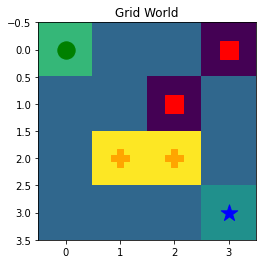

In [31]:
env = GridEnvironment()

obs = env.reset()
env.render()

In [32]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

Timestep: 1

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


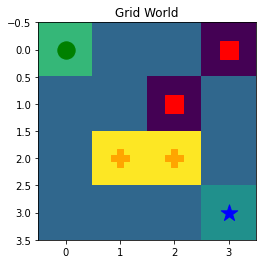

Timestep: 2

Current State: S5 = (1, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


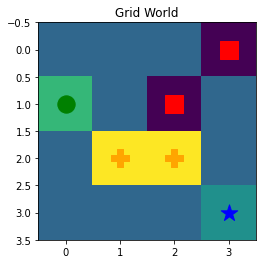

Timestep: 3

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


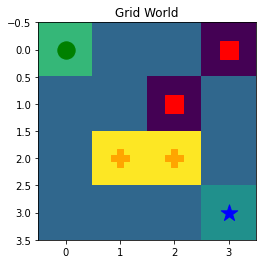

Timestep: 4

Current State: S1 = (0, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


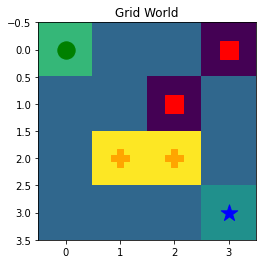

Timestep: 5

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


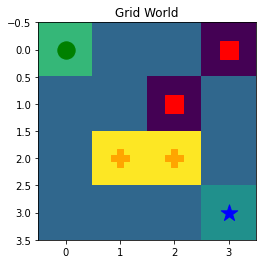

Timestep: 6

Current State: S1 = (0, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


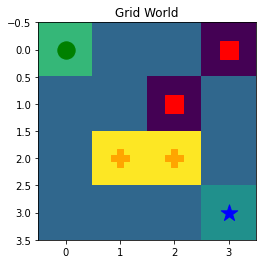

Timestep: 7

Current State: S5 = (1, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


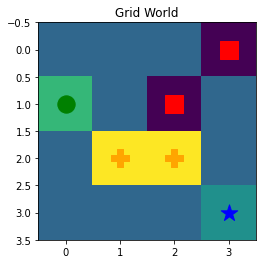

Timestep: 8

Current State: S9 = (2, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


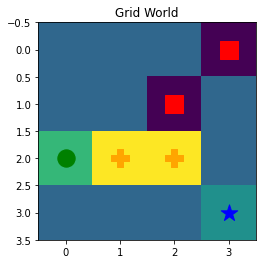

Timestep: 9

Current State: S10 = (2, 1) | Action = Right | Reward = 2 | Done = False | Terminated:False


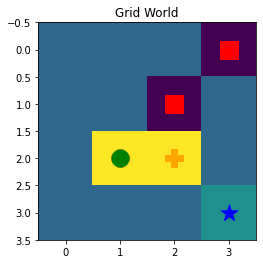

Timestep: 10

Current State: S11 = (2, 2) | Action = Right | Reward = 4 | Done = False | Terminated:True


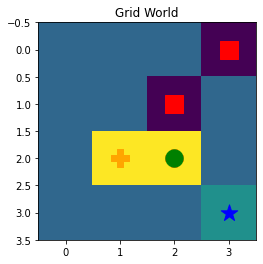

In [33]:
if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs = env.reset()
  terminated = False

  while not terminated:
    action = agent.step(obs)
    observation, reward, terminated, state, done, timestepCount = env.step(action)
    stateTup = tuple(state)
    print(f"Timestep: {timestepCount}")
    print(f"\nCurrent State: {statesEquivalent[stateTup]} = {stateTup} | Action = {actionsEquivalent[action]} | Reward = {reward} | Done = {done} | Terminated:{terminated}")
    env.render()